IMPORTING THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pandas.util.testing as tm

time: 1.27 ms (started: 2022-11-09 05:56:40 +00:00)


In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.45 s (started: 2022-11-09 05:56:40 +00:00)


uploading the dataset

In [ ]:
data=pd.read_csv('diamonds.csv')

time: 93.9 ms (started: 2022-11-09 05:56:44 +00:00)


In [ ]:
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


time: 25.2 ms (started: 2022-11-09 05:56:44 +00:00)


describe the dataset

In [ ]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


time: 78.5 ms (started: 2022-11-09 05:56:44 +00:00)


identifying the null values

In [ ]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

time: 25.9 ms (started: 2022-11-09 05:56:44 +00:00)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
time: 31.7 ms (started: 2022-11-09 05:56:44 +00:00)


In [ ]:
data=data.drop(['depth','table','x','y','z'],axis=1)

time: 7.71 ms (started: 2022-11-09 05:56:44 +00:00)


In [ ]:
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,price
0,1,0.23,Ideal,E,SI2,326
1,2,0.21,Premium,E,SI1,326
2,3,0.23,Good,E,VS1,327
3,4,0.29,Premium,I,VS2,334
4,5,0.31,Good,J,SI2,335


time: 11.9 ms (started: 2022-11-09 05:56:44 +00:00)


In [ ]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
price           int64
dtype: object

time: 7.46 ms (started: 2022-11-09 05:56:44 +00:00)


In [ ]:
data['price']=data.price.astype(float)
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
price         float64
dtype: object

time: 10.8 ms (started: 2022-11-09 05:56:44 +00:00)


DATA VISUALIZATION

Text(0.5, 1.0, 'Diamond price distribution')

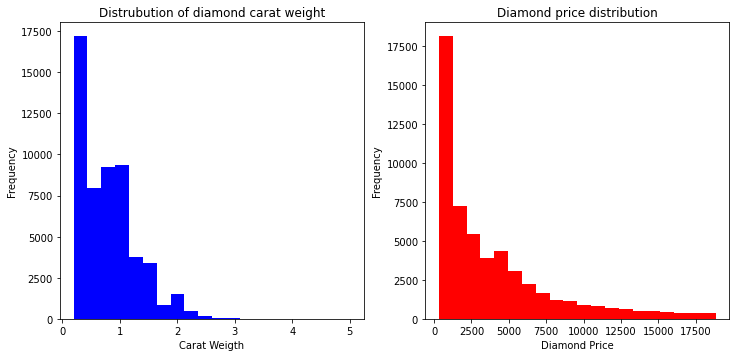

time: 631 ms (started: 2022-11-09 05:56:44 +00:00)


In [ ]:
plt.figure(figsize=[12,12])
plt.subplot(221)
#carat weigth distrubtion
plt.hist(data['carat'],bins=20,color='b')
plt.xlabel('Carat Weigth')
plt.ylabel('Frequency')
plt.title("Distrubution of diamond carat weight")
plt.subplot(222)
#distrubution of price value
plt.hist(data['price'],bins=20,color='r')
plt.xlabel("Diamond Price")
plt.ylabel("Frequency")
plt.title("Diamond price distribution")

CREATIN THE DEPENDANT AND INDEPENDANT VARIABLE

In [ ]:
data.head(1)

,Unnamed: 0,carat,cut,color,clarity,price
0,1,0.23,Ideal,E,SI2,326.0


time: 18.8 ms (started: 2022-11-09 05:56:45 +00:00)


CONVERTING CATEGORICAL DATA INTO NUMERIC FORM

In [ ]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
label=l1.fit_transform(data['cut'])
l1.classes_

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

time: 175 ms (started: 2022-11-09 05:56:45 +00:00)


In [ ]:
label

array([2, 3, 1, ..., 4, 3, 2])

time: 7.3 ms (started: 2022-11-09 05:56:45 +00:00)


In [ ]:
data['cut_label']=label

time: 2.47 ms (started: 2022-11-09 05:56:45 +00:00)


In [ ]:
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,price,cut_label
0,1,0.23,Ideal,E,SI2,326.0,2
1,2,0.21,Premium,E,SI1,326.0,3
2,3,0.23,Good,E,VS1,327.0,1
3,4,0.29,Premium,I,VS2,334.0,3
4,5,0.31,Good,J,SI2,335.0,1


time: 63.6 ms (started: 2022-11-09 05:56:45 +00:00)


In [ ]:
l2=LabelEncoder()
label1=l2.fit_transform(data['clarity'])
data['clarity_label']=label1
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,price,cut_label,clarity_label
0,1,0.23,Ideal,E,SI2,326.0,2,3
1,2,0.21,Premium,E,SI1,326.0,3,2


time: 69.6 ms (started: 2022-11-09 05:56:45 +00:00)


In [ ]:
data['color']=data['color'].map({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7,'NA':8}) #as.type(int)

time: 13 ms (started: 2022-11-09 05:56:45 +00:00)


In [ ]:
data['color'].fillna(0)

0        2
1        2
2        2
3        6
4        7
        ..
53935    1
53936    1
53937    1
53938    5
53939    1
Name: color, Length: 53940, dtype: int64

time: 9.63 ms (started: 2022-11-09 05:56:45 +00:00)


In [ ]:
data['color'].isnull().sum()

0

time: 23.1 ms (started: 2022-11-09 05:56:45 +00:00)


In [ ]:
data['color'] = data['color'].fillna(method = 'ffill')

time: 4.75 ms (started: 2022-11-09 05:56:45 +00:00)


In [ ]:
data.head(2)

,Unnamed: 0,carat,cut,color,clarity,price,cut_label,clarity_label
0,1,0.23,Ideal,2,SI2,326.0,2,3
1,2,0.21,Premium,2,SI1,326.0,3,2


time: 20.8 ms (started: 2022-11-09 05:56:45 +00:00)


In [ ]:
y=data['price']
y.head(1)

0    326.0
Name: price, dtype: float64

time: 6.81 ms (started: 2022-11-09 05:56:45 +00:00)


In [ ]:
x=data.drop(['price','cut','clarity'],axis=1)
x.head(1)

,Unnamed: 0,carat,color,cut_label,clarity_label
0,1,0.23,2,2,3


time: 26.1 ms (started: 2022-11-09 05:56:45 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

time: 109 ms (started: 2022-11-09 05:56:45 +00:00)


In [ ]:
len(x_train)

43152

time: 8.48 ms (started: 2022-11-09 05:56:46 +00:00)


In [ ]:
len(y_test)

10788

time: 11.1 ms (started: 2022-11-09 05:56:46 +00:00)


In [ ]:
43152+10788

53940

time: 13.7 ms (started: 2022-11-09 05:56:46 +00:00)


In [ ]:
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,price,cut_label,clarity_label
0,1,0.23,Ideal,2,SI2,326.0,2,3
1,2,0.21,Premium,2,SI1,326.0,3,2
2,3,0.23,Good,2,VS1,327.0,1,4
3,4,0.29,Premium,6,VS2,334.0,3,5
4,5,0.31,Good,7,SI2,335.0,1,3


time: 28.3 ms (started: 2022-11-09 05:56:46 +00:00)


STANDARD SCALAR METHOD

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

time: 32.5 ms (started: 2022-11-09 05:56:46 +00:00)


In [ ]:
len(data)

53940

time: 8.43 ms (started: 2022-11-09 05:56:46 +00:00)


In [ ]:
data.tail()

,Unnamed: 0,carat,cut,color,clarity,price,cut_label,clarity_label
53935,53936,0.72,Ideal,1,SI1,2757.0,2,2
53936,53937,0.72,Good,1,SI1,2757.0,1,2
53937,53938,0.70,Very Good,1,SI1,2757.0,4,2
53938,53939,0.86,Premium,5,SI2,2757.0,3,3
53939,53940,0.75,Ideal,1,SI2,2757.0,2,3


time: 23 ms (started: 2022-11-09 05:56:46 +00:00)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

time: 13.5 ms (started: 2022-11-09 05:56:46 +00:00)


K-NEIGHBORS REGRESSOR ALGORTIHM

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred3=knn.predict(x_test)

time: 181 ms (started: 2022-11-09 06:03:07 +00:00)


ACCURACY OF K-NEIGHBORS REGRESSOR ALGORTIHM

In [59]:
from sklearn.metrics import r2_score
knr = r2_score(y_test,pred3)*100
print(knr)

99.0101454837934
time: 4.19 ms (started: 2022-11-09 06:37:44 +00:00)


LINEAR REGRESSION ALGORITHM

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)
pred4=linreg.predict(x_test)

time: 47.8 ms (started: 2022-11-09 06:03:23 +00:00)


ACCURACY OF LINEAR REGRESSION MODEL

In [65]:
from sklearn.metrics import r2_score
lr = r2_score(y_test, pred3)*100
print(lr)

99.0101454837934
time: 3.64 ms (started: 2022-11-09 06:46:51 +00:00)


LASSO REGRESSIO ALGORITHM

In [ ]:
from sklearn.linear_model import Lasso
lassoreg = Lasso()

lassoreg.fit(x_train, y_train)
pred4 = lassoreg.predict(x_test)


time: 10.7 ms (started: 2022-11-09 06:03:20 +00:00)


ACCURACY OF LASSO REGRESSIO ALGORITHM

In [58]:
lasso = r2_score(y_test,pred4)*100
print(lasso)

87.96462213408553
time: 15.3 ms (started: 2022-11-09 06:35:25 +00:00)


RANDOMFOREST ALGORITHM

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
pred2=rf.predict(x_test)

time: 6.08 s (started: 2022-11-09 06:41:01 +00:00)


ACCURACY OF RANDOMFOREST ALGORITHM

In [61]:
from sklearn.metrics import r2_score
rfr = r2_score(y_test,pred2)*100
print(rfr)

99.91880721881084
time: 5.4 ms (started: 2022-11-09 06:42:20 +00:00)


OVERALL ACCURACY SCORE

In [66]:
print("LinearRegression",lr)
print("RandomForestRegressor",rfr)
print("KNN Regressor", knr)
print("Lasso Linear model",lasso)

LinearRegression 99.0101454837934
RandomForestRegressor 99.91880721881084
KNN Regressor 99.0101454837934
Lasso Linear model 87.96462213408553
time: 3.56 ms (started: 2022-11-09 06:47:00 +00:00)


In [68]:
def prediction():
  carat=(input("Enter the value of carat : "))
  cut=(input("Enter the value of cut : "))
  clarity=int(input("Enter the value of clarity : "))
  color=int(input("Enter tha value of color : "))
  colors=int(input("Enter tha value of color : "))

  price=linreg.predict([[carat,cut,clarity,color,colors]])

  print("Approximately Price of Diamond is ",price, 'Rs')

predi=prediction()
predi

Enter the value of carat : 0.24
Enter the value of cut : 5
Enter the value of clarity : 3
Enter tha value of color : 8
Enter tha value of color : 4
Approximately Price of Diamond is  [25312.50164776] Rs
time: 11.6 s (started: 2022-11-09 06:47:49 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
